In [97]:
from keras.models import Sequential
from keras.layers import Dense

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
!matplotlib widjet
import matplotlib.pyplot as plt

Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\Scripts\matplotlib-script.py", line 10, in <module>
    sys.exit(plotting._matplotlib())
AttributeError: module 'pandas.plotting' has no attribute '_matplotlib'


In [98]:
model = Sequential()
model.add(Dense(20, input_dim = 5, activation = 'relu'))
model.add(Dense(1))

model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['mean_squared_error'])

In [99]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 20)                120       
                                                                 
 dense_11 (Dense)            (None, 1)                 21        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________


In [100]:
from keras_visualizer import visualizer
visualizer(model, file_name = 'co2-model-vsr', file_format = 'jpg')

In [101]:
df = pd.read_csv('co2.csv')

In [102]:
df.describe()

,engine,cylandr,fuelcity,fuelwy,fuelcomb,out1
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,522.000000


In [103]:
df.shape

(7385, 6)

In [104]:
df.head(10)


,engine,cylandr,fuelcity,fuelwy,fuelcomb,out1
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267
9,2.4,4,10.6,7.5,9.2,212


In [105]:
x = df.drop('out1', axis = 1)
y = df.out1

In [106]:
x

,engine,cylandr,fuelcity,fuelwy,fuelcomb
0,2.0,4,9.9,6.7,8.5
1,2.4,4,11.2,7.7,9.6
2,1.5,4,6.0,5.8,5.9
3,3.5,6,12.7,9.1,11.1
4,3.5,6,12.1,8.7,10.6
...,...,...,...,...,...
7380,2.0,4,10.7,7.7,9.4
7381,2.0,4,11.2,8.3,9.9
7382,2.0,4,11.7,8.6,10.3
7383,2.0,4,11.2,8.3,9.9


In [107]:
y

0       196
1       221
2       136
3       255
4       244
       ... 
7380    219
7381    232
7382    240
7383    232
7384    248
Name: out1, Length: 7385, dtype: int64

In [108]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [109]:
h = model.fit(X_train, y_train, epochs = 600)

Epoch 1/600


185/185 [==============================] - 1s 2ms/step - loss: 62017.1914 - mean_squared_error: 62017.1914
Epoch 2/600
185/185 [==============================] - 0s 2ms/step - loss: 42019.7227 - mean_squared_error: 42019.7227
Epoch 3/600
185/185 [==============================] - 0s 2ms/step - loss: 18364.2559 - mean_squared_error: 18364.2559
Epoch 4/600
185/185 [==============================] - 0s 2ms/step - loss: 4652.6851 - mean_squared_error: 4652.6851
Epoch 5/600
185/185 [==============================] - 0s 2ms/step - loss: 986.5092 - mean_squared_error: 986.5092
Epoch 6/600
185/185 [==============================] - 0s 2ms/step - loss: 569.7887 - mean_squared_error: 569.7887
Epoch 7/600
185/185 [==============================] - 0s 2ms/step - loss: 547.9774 - mean_squared_error: 547.9774
Epoch 8/600
185/185 [==============================] - 0s 2ms/step - loss: 546.9245 - mean_squared_error: 546.9245
Epoch 9/600
185/185 [==============================] - 0s 2ms/step - loss: 546

In [110]:
Y_pred = model.predict(X_test)

47/47 [==============================] - 0s 1ms/step


In [111]:
Y_pred

array([[181.66693],
       [296.72263],
       [194.74863],
       ...,
       [237.89648],
       [341.85147],
       [202.61841]], dtype=float32)

In [112]:
y_test

2954    182
325     250
3080    194
3581    289
2692    288
       ... 
2509    302
5831    276
105     232
4489    344
2746    204
Name: out1, Length: 1477, dtype: int64

In [113]:
test1 = np.array([[4.4, 8, 18.1, 13.7, 16.1]])
model.predict(test1)

1/1 [==============================] - 0s 80ms/step


array([[353.64597]], dtype=float32)

In [114]:
h.history['loss']

[62017.19140625,
 42019.72265625,
 18364.255859375,
 4652.68505859375,
 986.5091552734375,
 569.7886962890625,
 547.9774169921875,
 546.9244995117188,
 546.2445678710938,
 545.4501342773438,
 544.6770629882812,
 543.9338989257812,
 543.0610961914062,
 541.3356323242188,
 541.0597534179688,
 540.0263061523438,
 538.9671020507812,
 537.7542114257812,
 535.269287109375,
 533.3377075195312,
 531.7701416015625,
 529.9888916015625,
 527.9188232421875,
 526.3541259765625,
 522.8607177734375,
 520.7360229492188,
 517.4591674804688,
 515.5906982421875,
 510.7894287109375,
 508.56390380859375,
 504.947998046875,
 500.7388610839844,
 496.5404968261719,
 492.6494445800781,
 487.6304626464844,
 482.9471435546875,
 479.5869445800781,
 474.727783203125,
 469.51116943359375,
 466.8656921386719,
 460.285888671875,
 456.5115966796875,
 452.0276184082031,
 446.27459716796875,
 443.3247375488281,
 438.1360778808594,
 434.0137939453125,
 429.8993835449219,
 425.0021667480469,
 420.7415771484375,
 416.26824

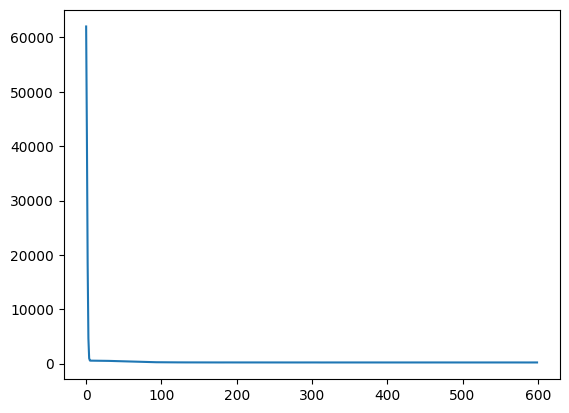

In [115]:
plt.close()
plt.plot(h.history['loss'])
plt.show()

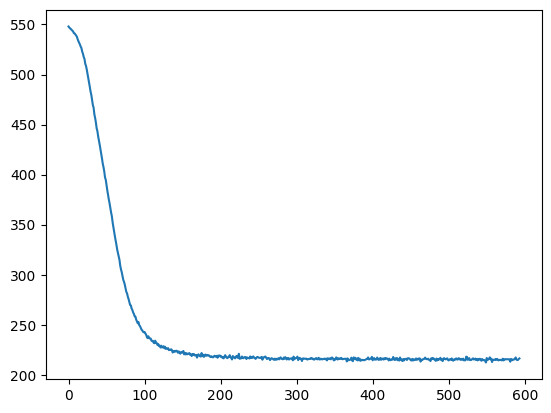

In [117]:
array1 = h.history['loss']
plt.close()
plt.plot(array1[6:])
plt.show()